# Herramientas de Programación

Uno de los principales motivos por los que las redes neuronales pueden ser implementadas eficientemente como algoritmos es que la mayoría de las operaciones, tanto para la activación como para el aprendizaje, pueden ser expresadas como operaciones matriciales. El objetivo de esta parte es ver algunos de los métodos para realizar estas operaciones y otras cosas que pueden resultar útiles al momento de implementar los algoritmos y evaluar su desempeño.

Para la implementación de los algoritmos vamos a usar el lenguaje de programación python, no solo porque es ampliamente utilizado en esta disciplina, sino porque es sencillo pero potente, y fácilmente accesible para todos, además de contar con una gran cantidad de librerías y ejemplos para todo tipo de aplicaciones en general.

Esto, sin embargo, no pretende ser ni una introducción ni un tutorial de python, sino más bien una guía de las herramientas que vamos a utilizar, con especial énfasis en algunas idiosincrasias particulares del lenguaje que comúnmente suelen causar problemas o confusión.

## Tipos nativos de python

Dijimos que una de las principales ventajas era poder expresar las operaciones como operaciones de matrices, sin embargo en python no tenemos como un tipo de dato nativo el tipo matriz, los tipos de datos con los que contamos son tupla y lista.

In [1]:
# Las tuplas se definen como valores separados por comas encerrados entre paréntesis.

a = (3,5)
print(a)

(3, 5)


In [2]:
# Los valores dentro de una tupla pueden ser accedidos mediante un índice entre corchetes. 
# El primer elemento tiene índice 0.

a[0]

3

In [3]:
# Sin embargo la tupla es un tipo inmutable, por lo tanto no es posible modificarla una vez definida.

a[0] = 1

TypeError: 'tuple' object does not support item assignment

In [4]:
# Una lista se define como valores separados por comas encerrados entre corchetes.

b = [5,7]

In [5]:
# Los valores de una lista pueden ser accedidos de la misma forma que con las tuplas.

b[0]

5

In [6]:
# Ahora si es posible modificar una lista una vez definida.

b[1] = 9
print(b)

[5, 9]


In [7]:
# No solo es posible cambiar los valores dentro de la lista sino que también es posible modficar la lista.

b.append( 3)      # Agrega un valor al final.
b.insert( 0, 2)   # Agrega el valor 2 en la posición 0.
b

[2, 5, 9, 3]

In [8]:
b.remove(9)       # Remueve el elemento con el valor 9 de la lista.
del b[1]          # Borra el valor en la posición 1.
b

[2, 3]

In [9]:
# Notar que la lista es un objeto que posee el método insert para agregar elementos en una posición. 
# Sin embargo no existe un método propio de la clase lista para eliminarlos, para eso usamos la función "del".
# Lo mismo sucede para ver que cantidad de elementos tiene una lista.

# b.len()  No existe.

len(b)   # En su lugar usamos la función "len".

2

In [10]:
# También es posible definir listas de listas para tener estructuras similares a matrices.

c = [ [1,2], [3,4] ]    # Es equivalente a tener una matriz de 2x2.

In [11]:
# Para acceder a sus los elementos, por tratarse de una lista de listas, se deben usar dos indirecciones.

c[0][0]

# c[0,0]   Usar directamente las coordenadas como índices sería más natural, pero con este tipo no es posible.

1

In [12]:
# También es posible generar listas de otras formas más dinámicas, por ejemplo usando "range" o por "comprehension".

a = range(5)                         # Rango de 5 elementos, enteros del 0 al 4. Es necesario convertirlo a lista.
b = list(range(3,10,2))              # Lista de 3 a 10 (no incluido) con incremento 2.
c = [ x*2+1 for x in range(1,5) ]    # Defino que elementos tiene la lista iterando sobre el range.

print( a, list(a))
print( b)
print( c)

range(0, 5) [0, 1, 2, 3, 4]
[3, 5, 7, 9]
[3, 5, 7, 9]


In [13]:
# También es posible acceder a porciones de los elementos de una lista usando la técnica de "slice".
# Esta permite indicar un intervalo de valores.

b[1:2]   # La notación indica acceder a los elementos desde la posición 1 incluida hasta antes de la posición 2,

[5]

In [14]:
b[1:]    # ...los elementos desde la posición 1 hasta el final,

[5, 7, 9]

In [15]:
b[:2]    # ...los elementos desde el comienzo hasta antes de la posición 2,

[3, 5]

In [16]:
b[-1:]   # Y usando índices negativos también es posible contar desde el final, -1 para indicar el último elemento.

[9]

In [17]:
b[::2]   # Todos los elementos, de a 2.

[3, 7]

In [18]:
c[1:3] = [1,2]   # También es posible asignar valores a un intervalo.
c

[3, 1, 2, 9]

## NumPy

El tipo lista nos servirá de base para muchas cosas, sin embargo no cuentan con operaciones algebraicas propias y tener que implementarlas a mano probablemente no resultaría muy práctico. Afortunadamente ya existe una librería que hace todo esto.

**Numpy** tiene dos tipos de datos básicos que pueden ser usados para estos fines, el tipo *array* y el tipo *matrix*, que es derivado de *array*.  Desafortunadamente el tipo *array* es quizás demasiado permisivo con las operaciones que considera válidas, y el tipo *matrix*, por el contrario, es demasiado restrictivo. 
Por lo tanto vamos a ver cómo podemos usar el tipo *array* para hacer las operaciones necesarias sin arriesgarnos demasiado a introducir alguna operación incorrecta sin darnos cuenta.

In [19]:
import numpy as num

# En muchos lugares van a ver que en lugar de "num" usan "np".
# Pueden usar lo que les resulte más cómodo. (ver 'import this')

In [20]:
# Existen varias operaciones para crear nuevos arreglos.
# array: toma una lista de valores numéricos como parámetros y crea el arreglo con esos elementos. 
# zeros y ones: toman como parámetro la dimensión y crea un arreglo de ceros o unos respectivamente.

a = num.array([5,7])   # vector con los elementos  < 5, 7 >
u = num.zeros(2)       # vector con ceros de dimensión 2.
v = num.zeros((1, 3))  # matriz con ceros de dimensión 1 por 3.
m = num.ones((3,2))    # matriz con unos de dimensión 3 por 2.

a, u, v, m

(array([5, 7]),
 array([0., 0.]),
 array([[0., 0., 0.]]),
 array([[1., 1.],
        [1., 1.],
        [1., 1.]]))

In [21]:
# El método size nos permite saber la cantidad de elementos que tiene el arreglo.

print( u.size)
print( v.size)
print( m.size)

2
3
6


In [22]:
# El método shape nos permite saber que dimensiones tiene el arreglo.
# Notar que u está definido como un vector de 2 valores, y que v está definido como una matriz de una sola fila.

print( u.shape)
print( v.shape)
print( m.shape)

(2,)
(1, 3)
(3, 2)


In [23]:
# Es posible acceder a los elementos del arreglo de forma similar a los de una lista.
print( u[0])
print( v[0])

0.0
[0. 0. 0.]


In [24]:
# Pero ahora además es válido usar las coordenadas como índices.
print( v[0][0])
print( v[0,0])

0.0
0.0


In [25]:
# La asignación de elementos también puede hacerse indicando rangos. 
# Al usar solo ':' se está indicando desde el comienzo hasta el fin, es decir, todos los elementos. 
# Notar que también es posible asignar un escalar a todos los elementos del arreglo.

v[:] = [2, 3, 4]
print( v)

u[:] = 2
print( u)

v[:] = 3
print( v)

[[2. 3. 4.]]
[2. 2.]
[[3. 3. 3.]]


In [26]:
# Dentro de numpy existen varios tipos de productos entre arreglos.
# Vamos a usar principalmente el producto interno, o 'dot product'.

m.dot( u)
num.dot( m, u)   # Las dos formas son equivalentes.

array([4., 4., 4.])

In [27]:
# Por lo general vamos a considerar a matrices de una fila como vectores.
# Y vamos a calcular el producto interno entre este tipo de vector y una matriz.

num.dot( v, m)

array([[9., 9.]])

In [28]:
# El producto con '*' hace una multiplicación elemento a elemento.

num.array([-1,3])*u

array([-2.,  6.])

In [29]:
# Entre un vector y una matriz hace la operación para cada fila si las dimensiones son correctas.

u*m

array([[2., 2.],
       [2., 2.],
       [2., 2.]])

In [30]:
# Una ventaja de usar matrices de una fila es obtener advertencias tempranas de posibles operaciones incorrectas.

m*v

ValueError: operands could not be broadcast together with shapes (3,2) (1,3) 

In [31]:
# Además con el operador 'T' es posible realizar una transposición.

m*v.T

array([[3., 3.],
       [3., 3.],
       [3., 3.]])

In [32]:
# Notar que el operador 'T' no tiene efecto sobre vectores y no produce ninguna advertencia.

print( u.shape, u.T.shape == u.shape)
print( v.shape, v.T.shape == v.shape)


(2,) True
(1, 3) False


In [33]:
# Si tenemos un vector es posible convertirlo a una matriz fila con 'reshape'.

u.reshape((2,1))

array([[2.],
       [2.]])

Para profundizar más en el tema pueden ver la documentación de otras operaciones como *inner*, *outer*, *prod*, y *multiply*.

Para el cambio de dimensión de un arreglo ver *flatten*, y las diferencias entre *num.resize* vs *{obj}.resize*.

## Condicionales

Otra de las ventajas que brinda **numpy** es la facilidad de chequear condiciones simultáneamente sobre todos los elementos de un arreglo. Para esto es posible usar la función *where* o varios condicionales.

In [34]:
# Con where se pasan como parámetros la condición a chequear y...
# los valores a devolver en un nuevo arreglo en caso de que sea verdadera o falsa.

y = num.array([ -1, 0, 1])
num.where( y>0, +10, -5)

array([-5, -5, 10])

In [35]:
# También es posible usar directamente un condicional y la matriz resultante será booleana.

(y>0)

array([False, False,  True])

In [36]:
# Los tipos booleanos pueden ser interpretados como numéricos.

(y>0)*1

array([0, 0, 1])

In [37]:
# Con 'any' y 'all' es posible chequear si una condición se cumple para alguno o todos los elementos del arreglo.

num.any(y>0)

True

## Distribuciones aleatorias

Otra de las facilidades de la librería que vamos a aprovechar es la capacidad para trabajar con valores aleatorios y otras operaciones relacionadas con probabilidades y estadísticas.

In [38]:
# Dentro del módulo 'random' contamos con 'uniform' y 'normal' para generar valores con estas distribuciones.
# Los primeros parámetros son los propios de la distribución y el último son las dimensiones del arreglo que generará.

x = num.random.uniform( -1, 1, (1,6))
w = num.random.normal( 0, 1, (6,3))

print( x)
print( w)

[[ 0.89219363  0.74644275 -0.93916359  0.10516483 -0.38991002 -0.26041266]]
[[ 1.23248744 -0.10980729  1.27069256]
 [-1.10291272 -0.69041829 -0.67508381]
 [-0.78405066  0.31298303  0.27941762]
 [ 0.25349747 -0.40921531 -0.09456262]
 [ 0.81048756  2.07723983  0.69725355]
 [-0.83008356  0.57854143  2.28338657]]


In [39]:
# Esto nos va a servir para inicializar los parámetros de los modelos, y en algunos casos para generar datos de prueba.

# Por ejemplo si consideramos que x son datos de entrada y w son los parámetros de nuestro modelo...
# podemos generar una respuesta usando 'dot' y guardando el resultado en la fila 'y'...
# usando la asignación con '[:]' para asegurarnos que el resultado de la operación e 'y' tienen las mismas dimensiones.

y = num.zeros((1,3))

y[:] = num.dot( x, w)
print( y)

[[ 0.93951414 -1.91090055 -0.50906004]]


Otras operaciones que puede resultar útiles son:

sum, mean, std | min, max | argmin, argmax

num.random. choice | sample | shuffle | permutation


## Gráfico de funciones

Finalmente, en algunas ocasiones, vamos a necesitar ver algunos resultados o características de los datos en una forma más gráfica para poder apreciar cosas que un simple *print* no nos permitiría.

Para esto vamos a utilizar otra librería llamada *matplotlib* que cuenta con muchas opciones y variantes de tipos de gráficos. Pero nosotros podemos limitarnos al módulo *pyplot* que importaremos con el nombre *mpl*.

In [40]:
from matplotlib import pyplot as mpl


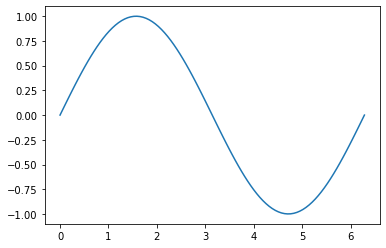

In [41]:
# En este ejemplo 'linspace' genera un arreglo de 100 valores igualmente distribuídos en el internvalo 0 y 2*pi.
# Y la función 'sin' de numpy es aplicada a todos los elementos de ese arreglo.

x = num.linspace( 0, 2*num.pi, 100)
y = num.sin( x)

g = mpl.plot( x, y)
mpl.show()

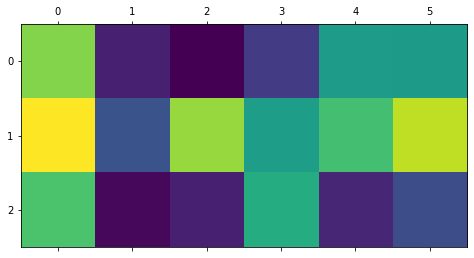

In [42]:
# Otra función útil es 'matshow' que sirve para representar gráficamente los valores de las matrices.

m = num.random.uniform( -10, 5, (3,6))
mpl.matshow( m)
mpl.show()